In [7]:
import networkx as nx
from networkx import *
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from nltk import sent_tokenize,word_tokenize
import numpy as np

import sys
sys.path.append('../..')
sys.path.append('../../utils/')
from utils import *
import operator


import fastText
model = fastText.load_model('../../../Divers_Data_Maitrise/wiki.simple/wiki.simple.bin')

#ignorer toutes les depreciations de fonctiona
import warnings
warnings.simplefilter('ignore')

In [17]:
def Alignement_graph_bipartite(question,sequence, nb_alignement_a_afficher = 1, lower_case_bool = True):
    '''
    Fonction qui crée un graphe bipartit (question, sentence) et qui affecte la similarité 
    cosine comme poids de chaque arete. L'arete en trait plein represente la plus forte similaritée,
    les autres similarite seront affichées avec des traits discontinus.
    :param nb_alignement_a_afficher: nombre de similaritées a afficher
    :param lower_case_bool: True pour mettre tout en minuscule, False sinon
    '''
    
    nb_alignement_a_afficher = max(1,nb_alignement_a_afficher)
    G=nx.Graph()

    list_words_question = word_tokenize(question.lower() if lower_case_bool else question)
    list_words_sequence = word_tokenize(sequence.lower() if lower_case_bool else sequence)
    
    
    nb_words_question = len(list_words_question)
    nb_words_sequence = len(list_words_sequence)
    height_colum = max(nb_words_question,nb_words_sequence)
    y_linspace_question = np.linspace(0,height_colum,nb_words_question)
    y_linspace_sentence = np.linspace(0,height_colum,nb_words_sequence)
    
    fixed_positions={}
    labels={}
    
    
    list_major_edges = []
    list_minor_edges = []
    edge_labels = {}
    for i in range(0,nb_words_sequence): # mots de la phrase
        num_node = nb_words_question + i
        G.add_node(num_node)
        labels[num_node]=list_words_sequence[i]
        
        fixed_positions[num_node] = (2,y_linspace_sentence[nb_words_sequence-i-1])
    
    for i in range(0,nb_words_question): # mots de la question
        G.add_node(i)
        labels[i]=list_words_question[i]
        fixed_positions[i] = (0,y_linspace_question[nb_words_question-i-1])
        
        max_sim = 0.0
        major_edge = None
        edges_list = []
        edges_sim_dict ={}
        vect_word_question = model.get_word_vector(list_words_question[i])
        for j in range(0,nb_words_sequence):
            num_node = nb_words_question + j
            vect_word_sentence = model.get_word_vector(list_words_sequence[j])
            sim=cosine_similarity(vect_word_sentence, vect_word_question)
            
            edges_sim_dict[len(edges_list)]=sim
            edges_list.append((i,num_node, sim))
            G.add_edge(i,num_node,sim=sim)
            
        edges_sorted = sorted(edges_sim_dict.items(), key=operator.itemgetter(1), reverse=True)[0:nb_alignement_a_afficher]
        list_major_edges.append(edges_list[edges_sorted[0][0]])
        edge_labels[(edges_list[edges_sorted[0][0]][1],edges_list[edges_sorted[0][0]][0])]=edges_list[edges_sorted[0][0]][2]
        for k in range(1,len(edges_sorted)):
            list_minor_edges.append(edges_list[edges_sorted[k][0]])
            edge_labels[(edges_list[edges_sorted[k][0]][1],edges_list[edges_sorted[k][0]][0])]=edges_list[edges_sorted[k][0]][2]
                              
    pos = nx.spring_layout(G,pos=fixed_positions, fixed=fixed_positions.keys())
    plt.figure(3,figsize=(15,height_colum*1.75))
    nx.draw_networkx_nodes(G,pos,node_color='w',node_size=2500)
    nx.draw_networkx_labels(G,pos,labels,font_size=14)
    nx.draw_networkx_edge_labels(G,pos,node_color='b',edge_labels=edge_labels, label_pos=0.08)
    nx.draw_networkx_edges(G,pos,node_color='b', edgelist =list_major_edges,  width = 2.0)
    nx.draw_networkx_edges(G,pos,node_color='b', edgelist =list_minor_edges,style = 'dashed',  width = 1.0)
    
    plt.axis('off')
#     plt.savefig("Graph.png", format="PNG") # pour enregistrer l'image dans un fichier
    plt.show()
    


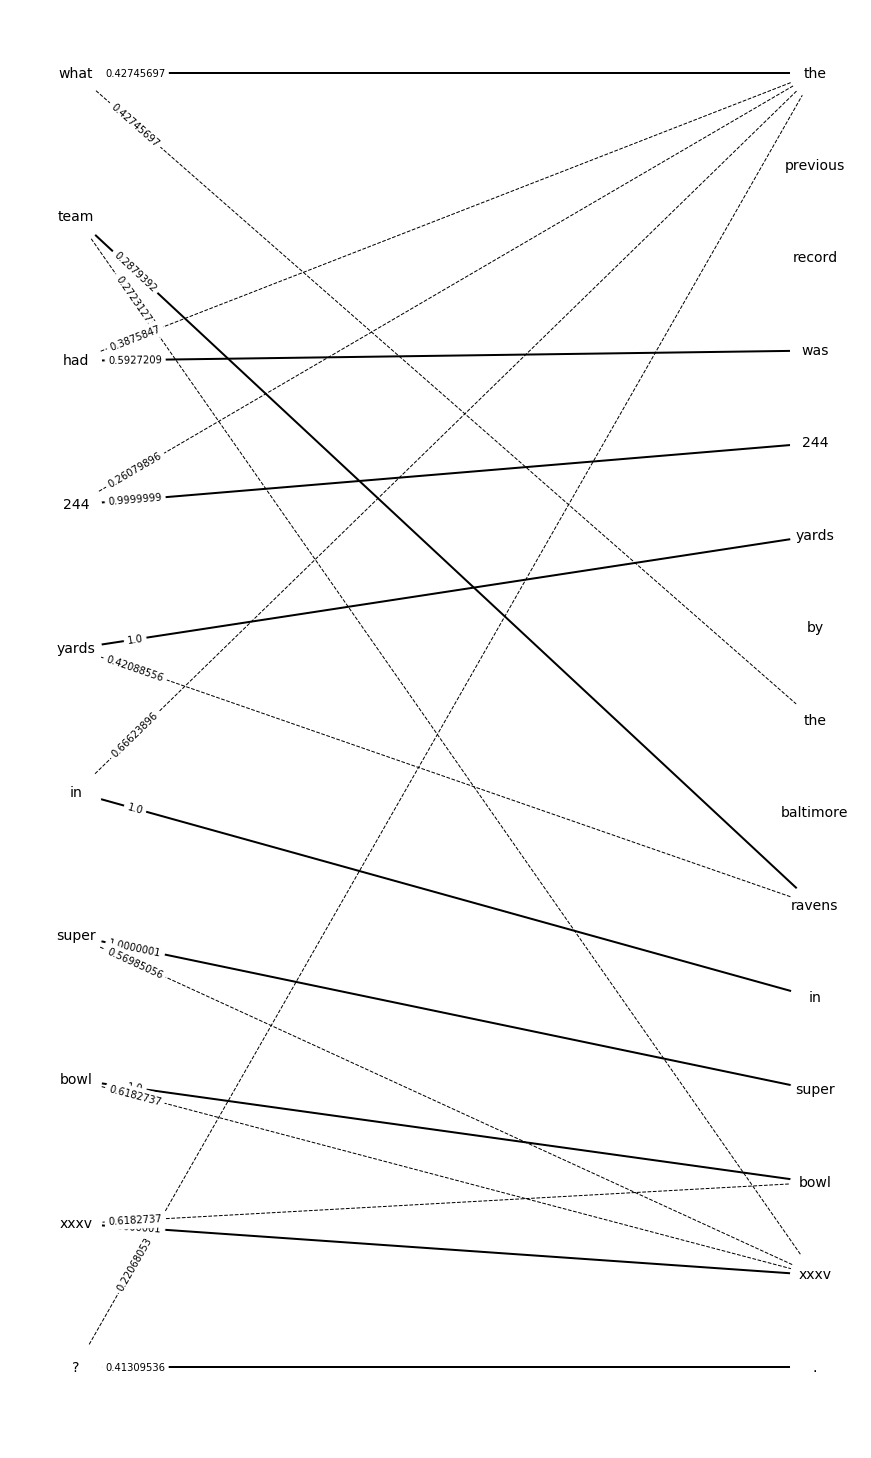

In [15]:
Alignement_graph_bipartite(" What team had 244 yards in Super Bowl XXXV? "," The previous record was 244 yards by the Baltimore Ravens in Super Bowl XXXV. ", 2)

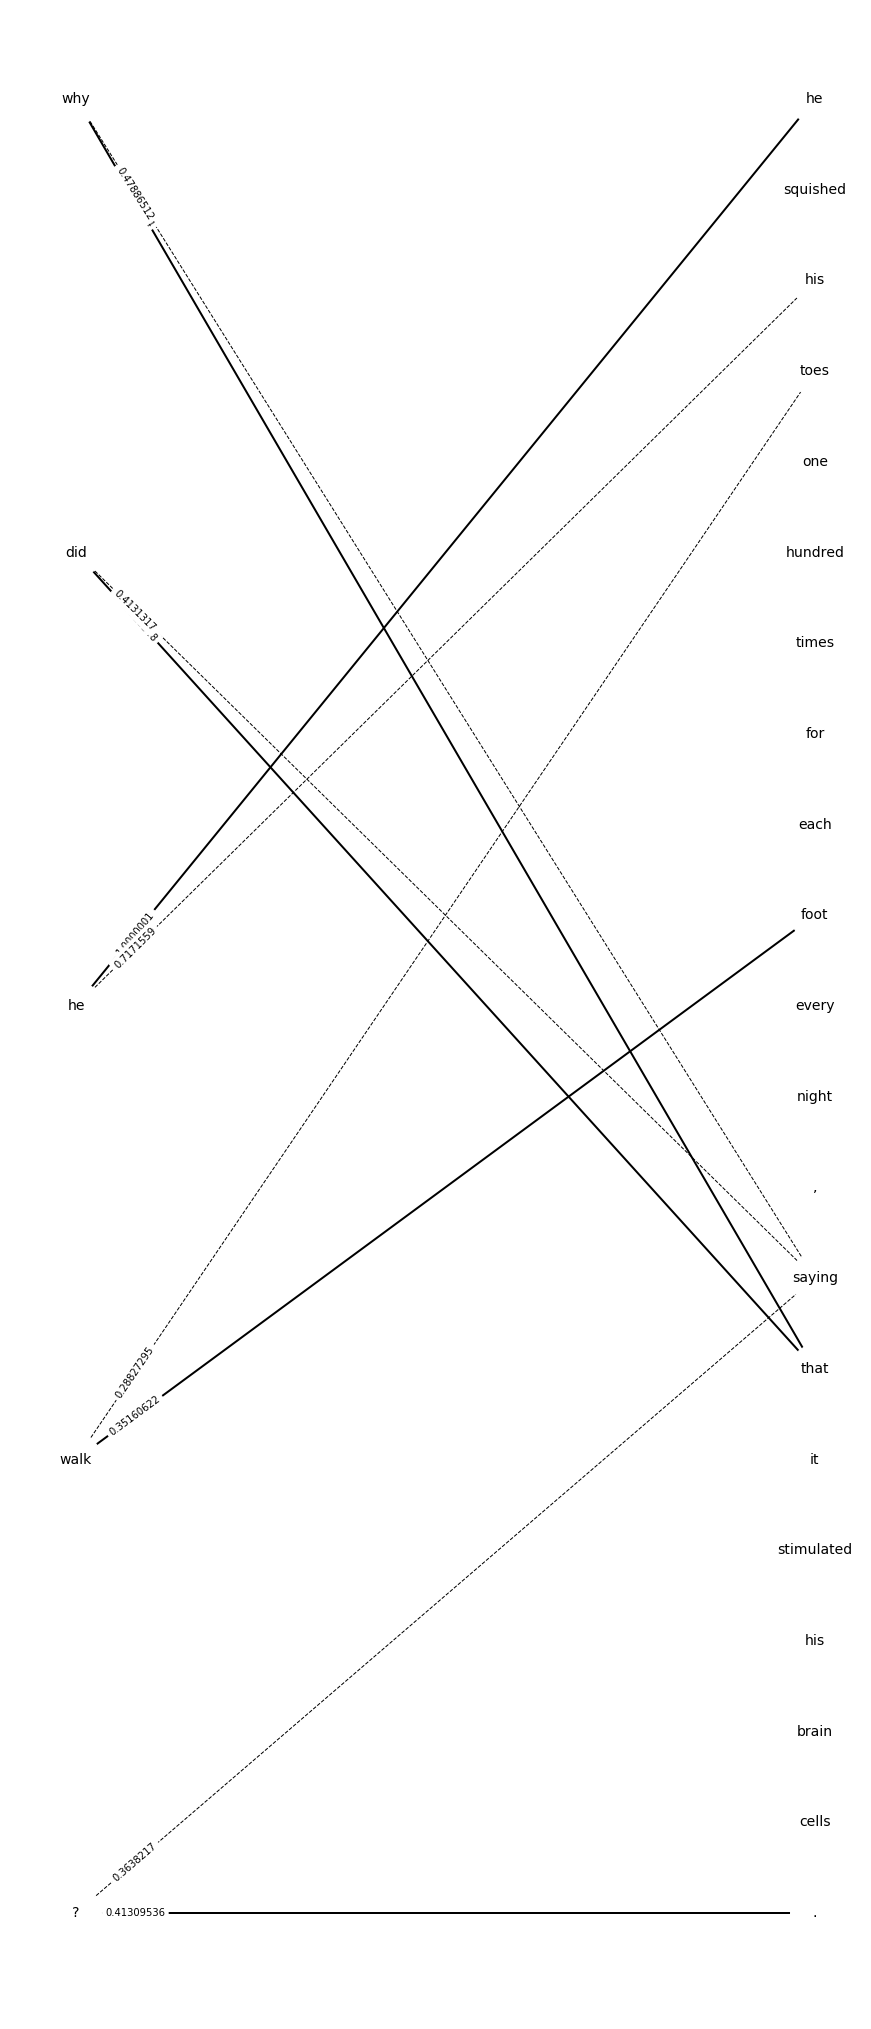

In [18]:
Alignement_graph_bipartite(" Why did he walk? "," He squished his toes one hundred times for each foot every night, saying that it stimulated his brain cells. ", 2)

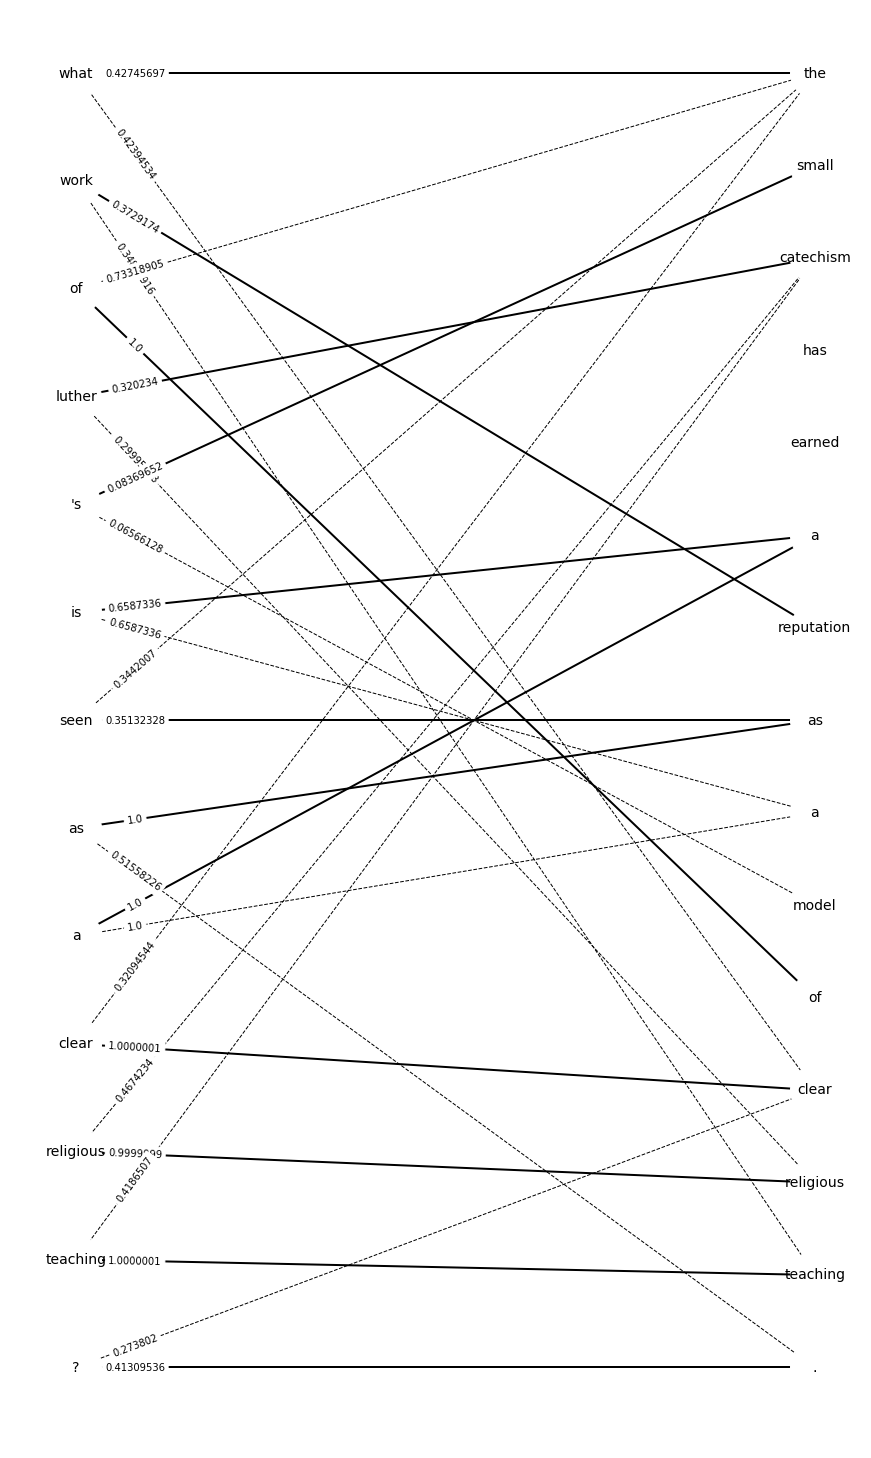

In [19]:
Alignement_graph_bipartite(" What work of Luther's is seen as a clear religious teaching? "," The Small Catechism has earned a reputation as a model of clear religious teaching. ", 2)

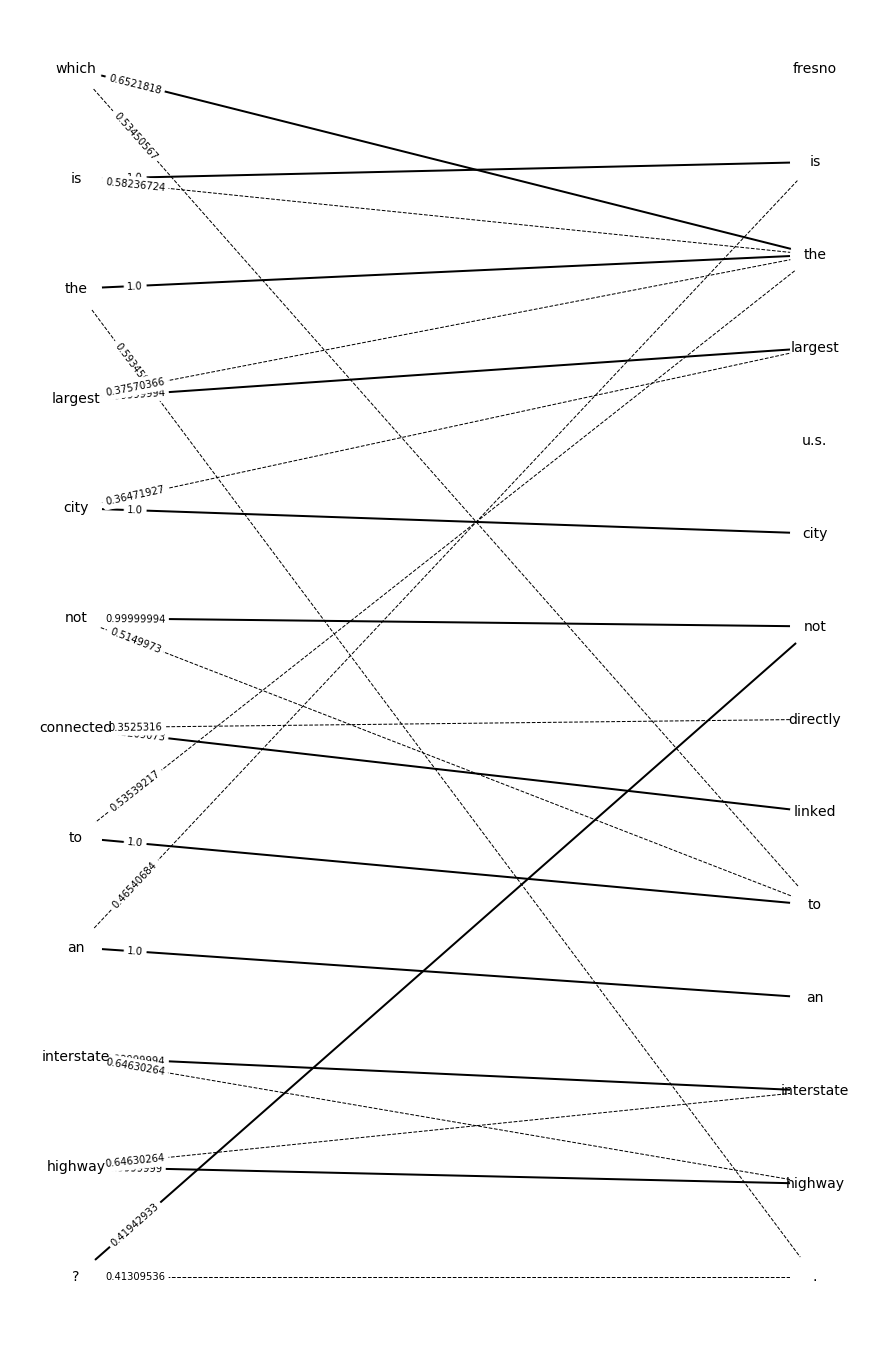

In [20]:
Alignement_graph_bipartite(" Which is the largest city not connected to an interstate highway? "," Fresno is the largest U.S. city not directly linked to an Interstate highway. ", 2)

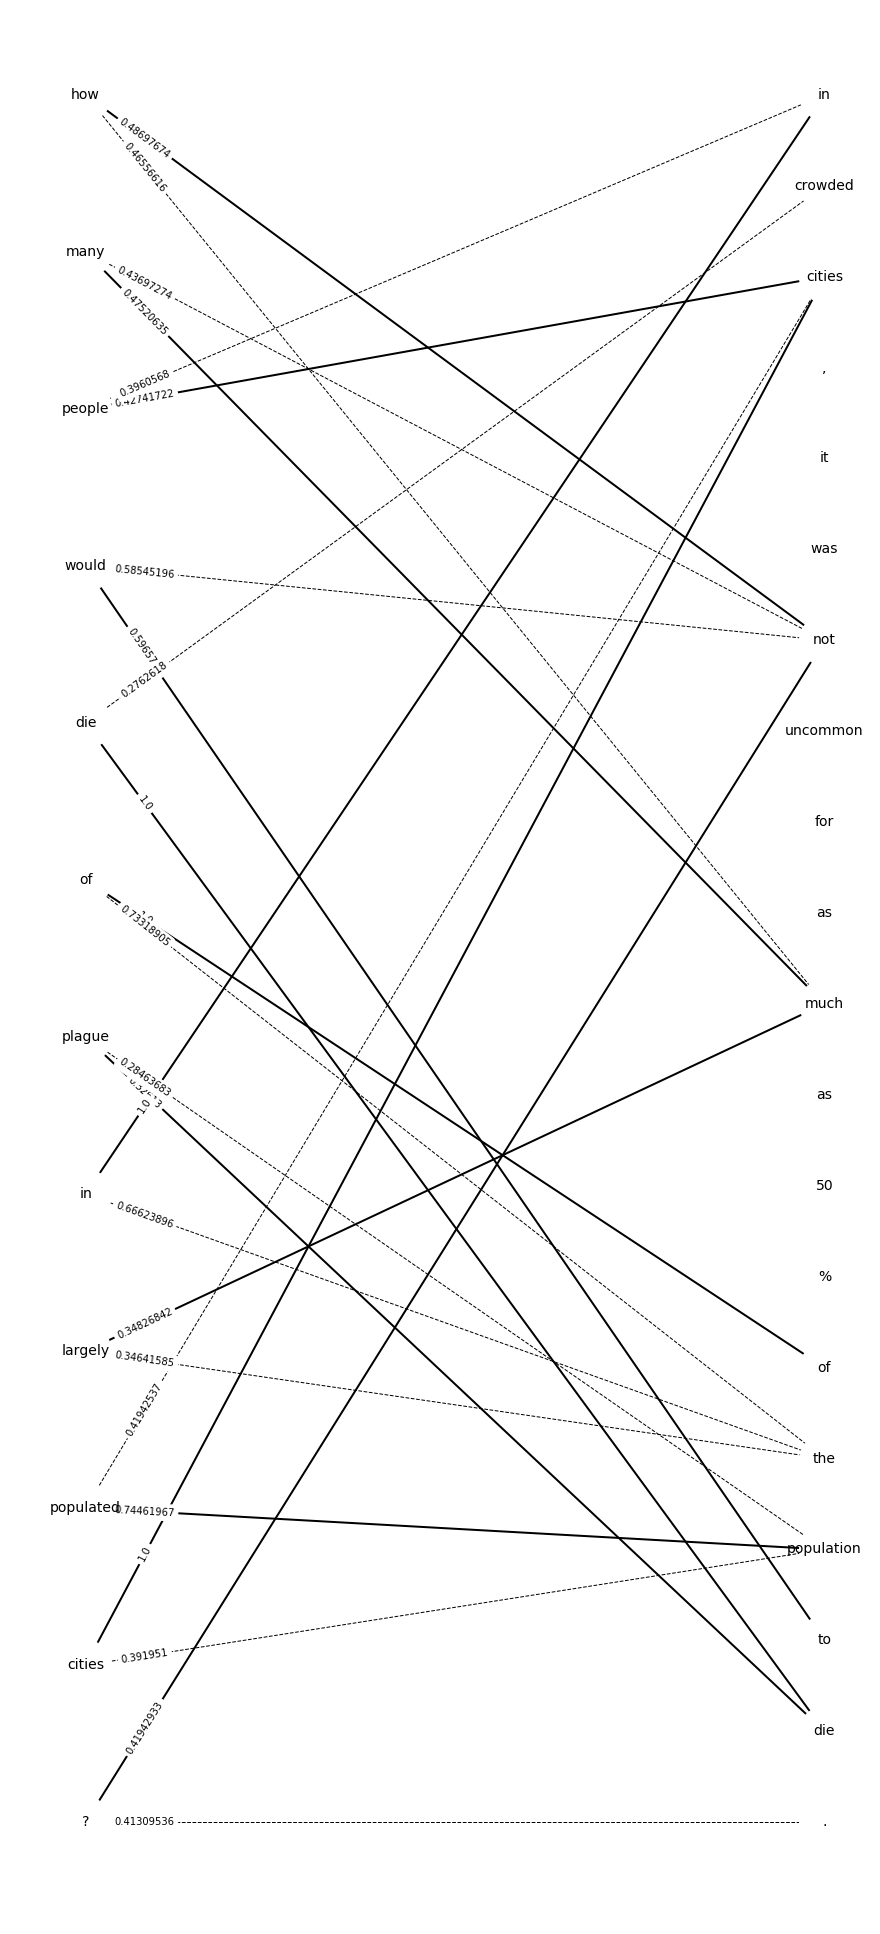

In [21]:
Alignement_graph_bipartite(" How many people would die of plague in largely populated cities? "," In crowded cities, it was not uncommon for as much as 50% of the population to die. ", 2)

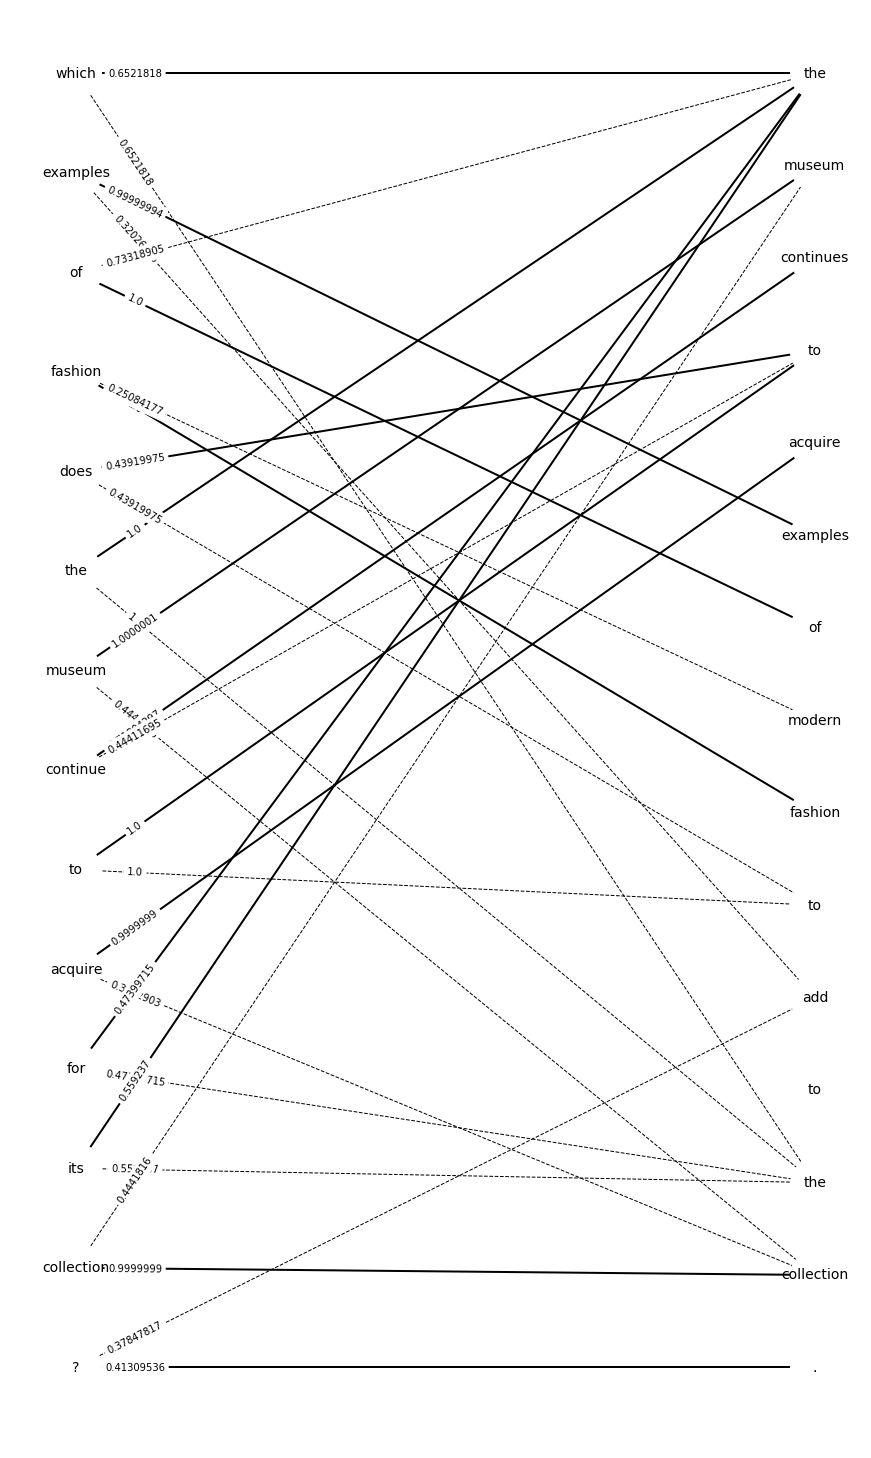

In [22]:
Alignement_graph_bipartite(" Which examples of fashion does the museum continue to acquire for its collection? "," The museum continues to acquire examples of modern fashion to add to the collection. ", 2)

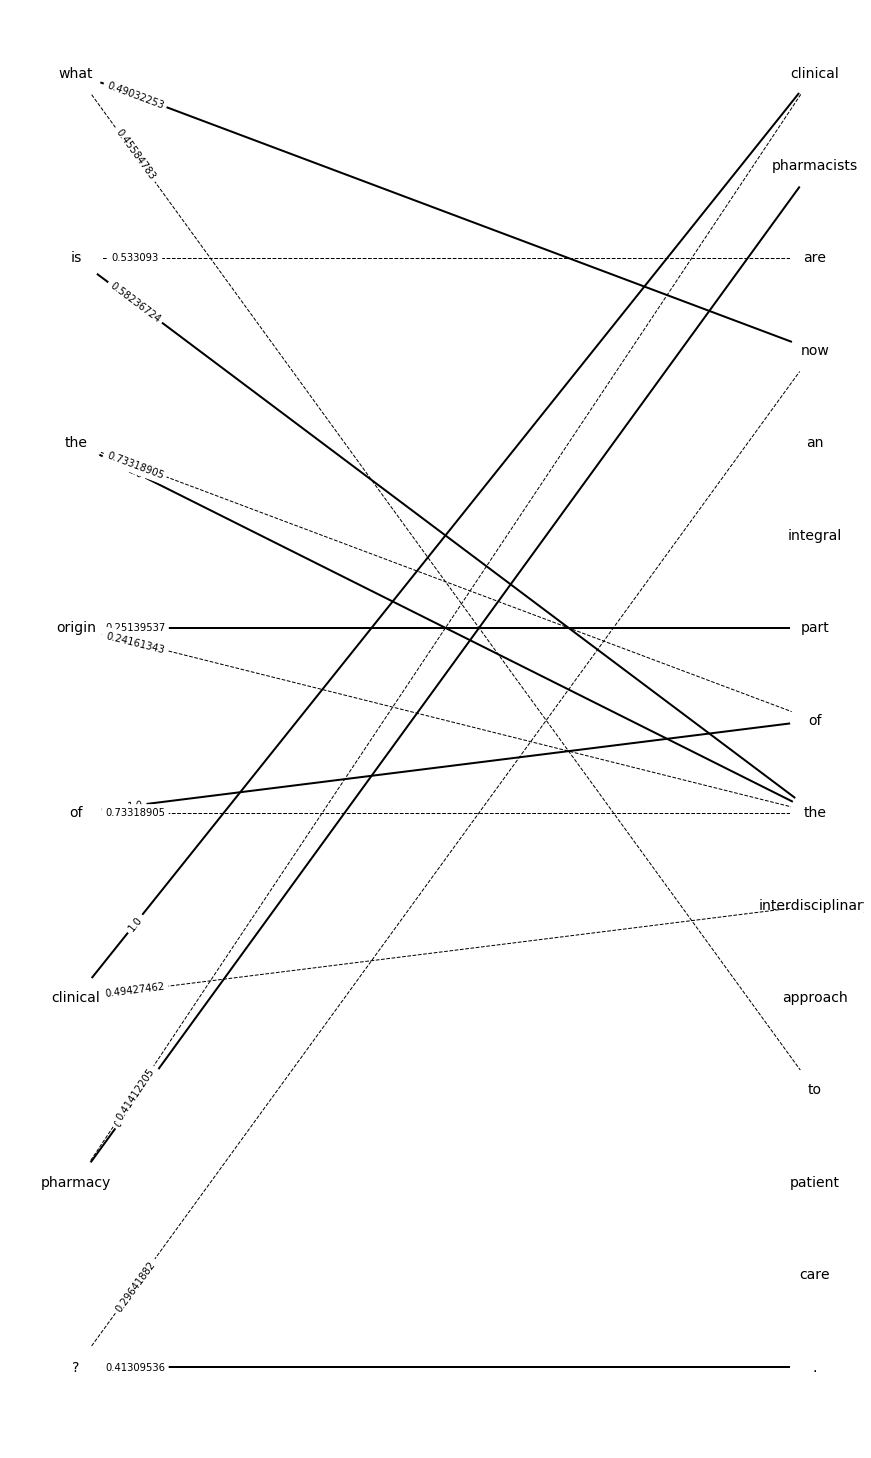

In [23]:
Alignement_graph_bipartite(" What is the origin of clinical pharmacy? "," Clinical pharmacists are now an integral part of the interdisciplinary approach to patient care. ", 2)

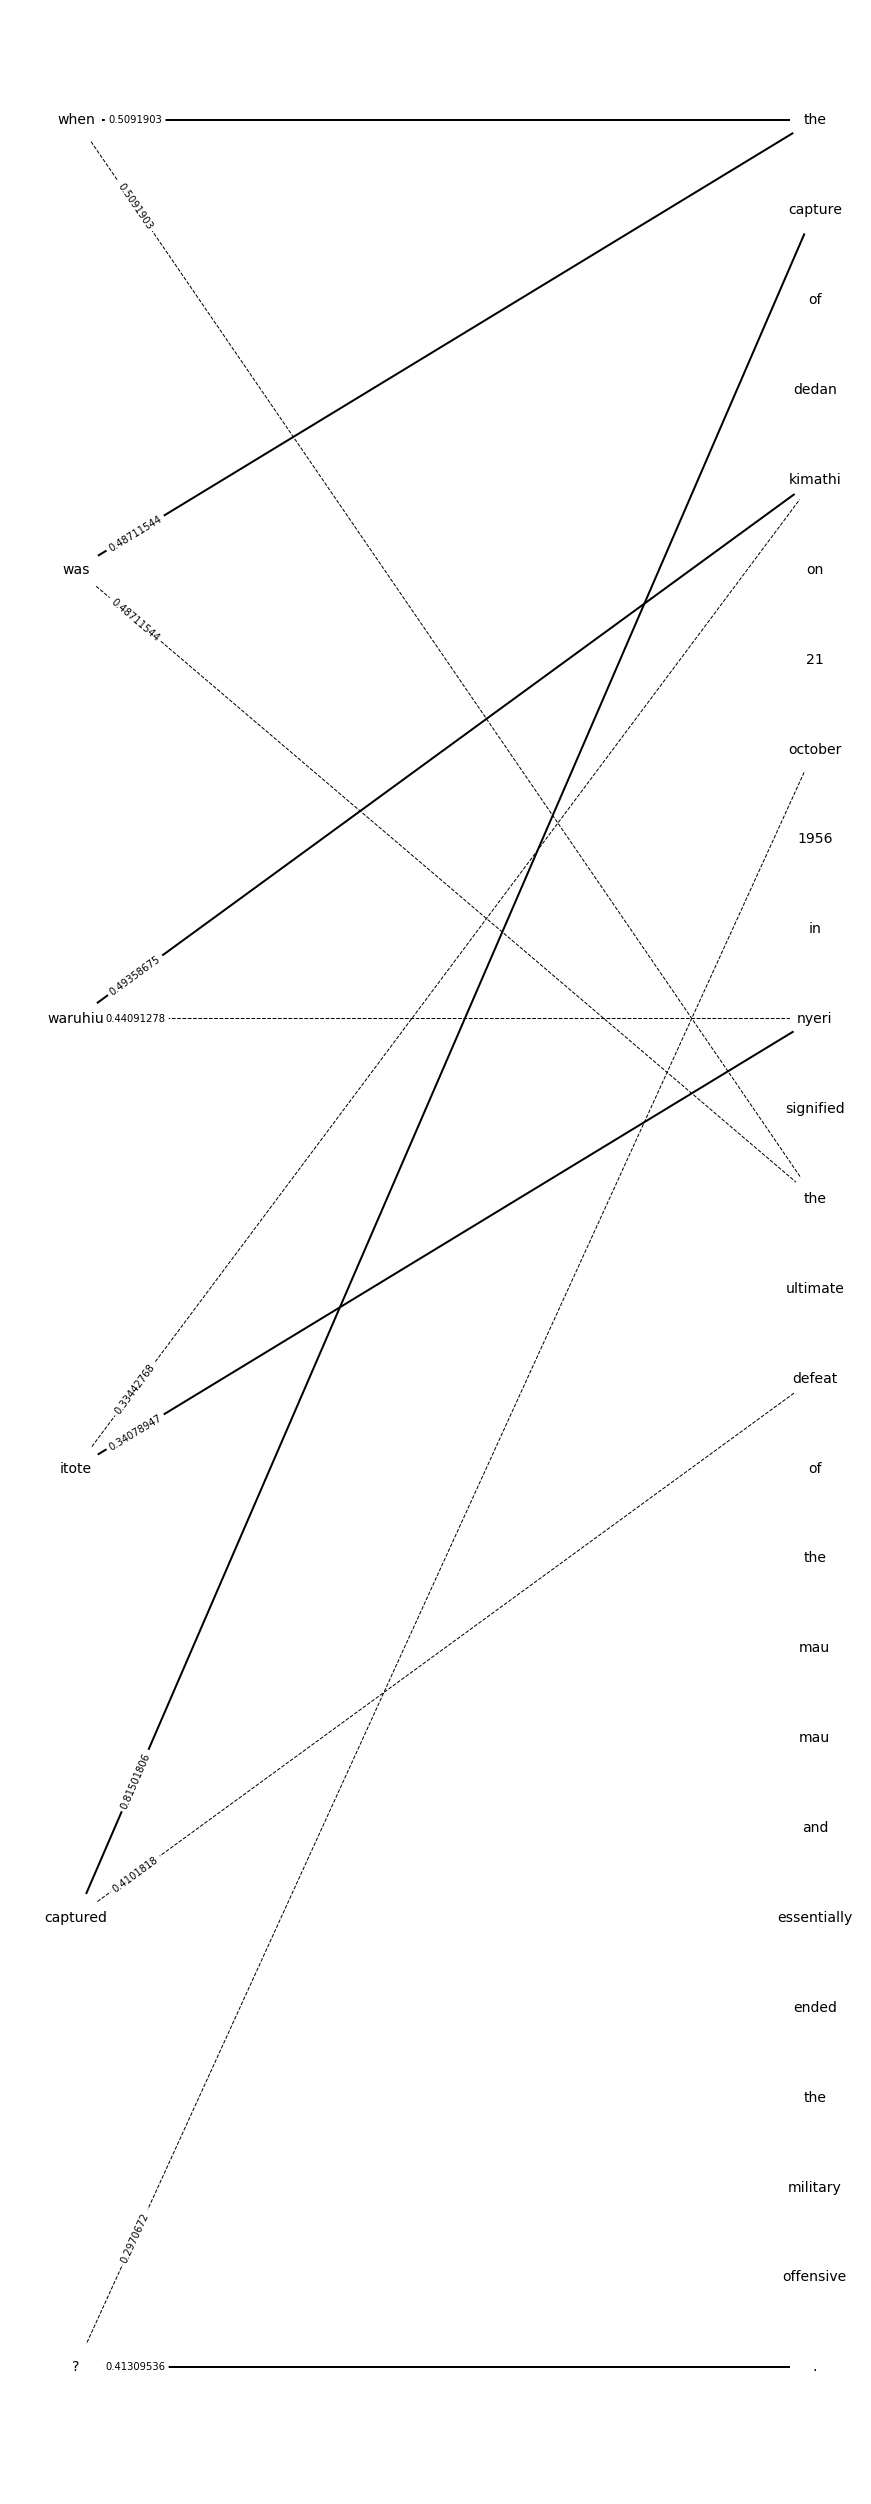

In [24]:
Alignement_graph_bipartite(" When was Waruhiu Itote captured? "," The capture of Dedan Kimathi on 21 October 1956 in Nyeri signified the ultimate defeat of the Mau Mau and essentially ended the military offensive. ", 2)